# Breast Cancer Classification

### 1. Introduction



This project's goal is to find out a relative good way to predict whether the cancer is benign or malignant. 

### 2. Dataset

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) is a popular cancer dataset from UCI datasets.

>  
> Data Set Information:
> 
> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]
> 
> Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.
> 
> The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
> 
> This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/
> 
> Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
> 
> Attribute Information:
> 
> 1) ID number
> 2) Diagnosis (M = malignant, B = benign)
> 3-32)
> 
> Ten real-valued features are computed for each cell nucleus:
> 
> a) radius (mean of distances from center to points on the perimeter)
> 
> b) texture (standard deviation of gray-scale values)
> 
> c) perimeter
> 
> d) area
> 
> e) smoothness (local variation in radius lengths)
> 
> f) compactness (perimeter^2 / area - 1.0)
> 
> g) concavity (severity of concave portions of the contour)
> 
> h) concave points (number of concave portions of the contour)
> 
> i) symmetry
> 
> j) fractal dimension ("coastline approximation" - 1)
> 
> The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.
> 
> All feature values are recoded with four significant digits.
> 
> Missing attribute values: none
> 
> Class distribution: 357 benign, 212 malignant

In [1]:
import os 
import pprint
import time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import time
import pprint

In [4]:
# load data
dataset = pd.read_csv('./data.csv')

### 3. Data preprocessing

In [5]:
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,28.26,77.80,436.6,0.1087,0.1782,0.15640,0.06413,0.3169,0.08032,NaN
520,917092,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,...,17.84,67.84,326.6,0.1850,0.2097,0.09996,0.07262,0.3681,0.08982,NaN
431,907915,B,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359,NaN
259,88725602,M,15.530,33.56,103.70,744.9,0.10630,0.16390,0.17510,0.08399,...,49.54,126.30,1035.0,0.1883,0.5564,0.57030,0.20140,0.3512,0.12040,NaN
499,91485,M,20.590,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,...,30.76,163.20,1760.0,0.1464,0.3597,0.51790,0.21130,0.2480,0.08999,NaN
485,913063,B,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,...,21.03,97.82,580.6,0.1175,0.4061,0.48960,0.13420,0.3231,0.10340,NaN
301,892604,B,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,...,23.07,88.13,551.3,0.1050,0.2158,0.19040,0.07625,0.2685,0.07764,NaN
373,901288,M,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.08941,...,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055,NaN
401,904647,B,11.930,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,...,20.14,87.64,589.5,0.1374,0.1575,0.15140,0.06876,0.2460,0.07262,NaN
138,868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,21.43,121.40,971.4,0.1411,0.2164,0.33550,0.16670,0.3414,0.07147,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [10]:
dataset = dataset.drop(columns=['id'])

In [11]:
dataset.shape

(569, 31)

In [12]:
# dataset.dropna(inplace=True)

In [13]:
# d = dataset.convert_dtypes()

### 4. Data EDA

In [14]:
value_counts = dataset['diagnosis'].value_counts().sort_index()
pie_data =  value_counts.values
pie_labels = value_counts.index

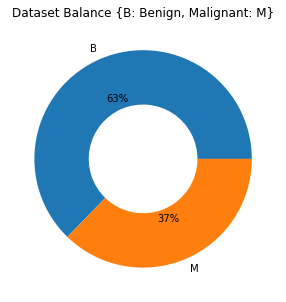

In [15]:
plt.figure(figsize = (5,5))
plt.title('Dataset Balance {B: Benign, Malignant: M}')
plt.pie(pie_data, labels=pie_labels, autopct = '%0.0f%%', wedgeprops=dict(width=0.5))
plt.show()

In [16]:
print(pie_labels)
print(pie_data)

Index(['B', 'M'], dtype='object')
[357 212]


In [17]:
# Person correlation with radius_mean
person_corr = dataset.corr()
person_related = person_corr['radius_mean'][person_corr['radius_mean'] >= 0.5].sort_values(ascending=False)
person_related

radius_mean             1.000000
perimeter_mean          0.997855
area_mean               0.987357
radius_worst            0.969539
perimeter_worst         0.965137
area_worst              0.941082
concave points_mean     0.822529
concave points_worst    0.744214
area_se                 0.735864
radius_se               0.679090
concavity_mean          0.676764
perimeter_se            0.674172
concavity_worst         0.526911
compactness_mean        0.506124
Name: radius_mean, dtype: float64

In [18]:
# Spearman's correlation with radius_mean
spearman_corr = dataset.corr(method='spearman')
spearman_related = spearman_corr['radius_mean'][spearman_corr['radius_mean'] >= 0.5].sort_values(ascending=False)
spearman_related

radius_mean             1.000000
area_mean               0.999602
perimeter_mean          0.997802
area_worst              0.978863
radius_worst            0.978604
perimeter_worst         0.971555
concave points_mean     0.759702
area_se                 0.738077
concave points_worst    0.727265
concavity_mean          0.645728
concavity_worst         0.596043
perimeter_se            0.565520
radius_se               0.550247
Name: radius_mean, dtype: float64

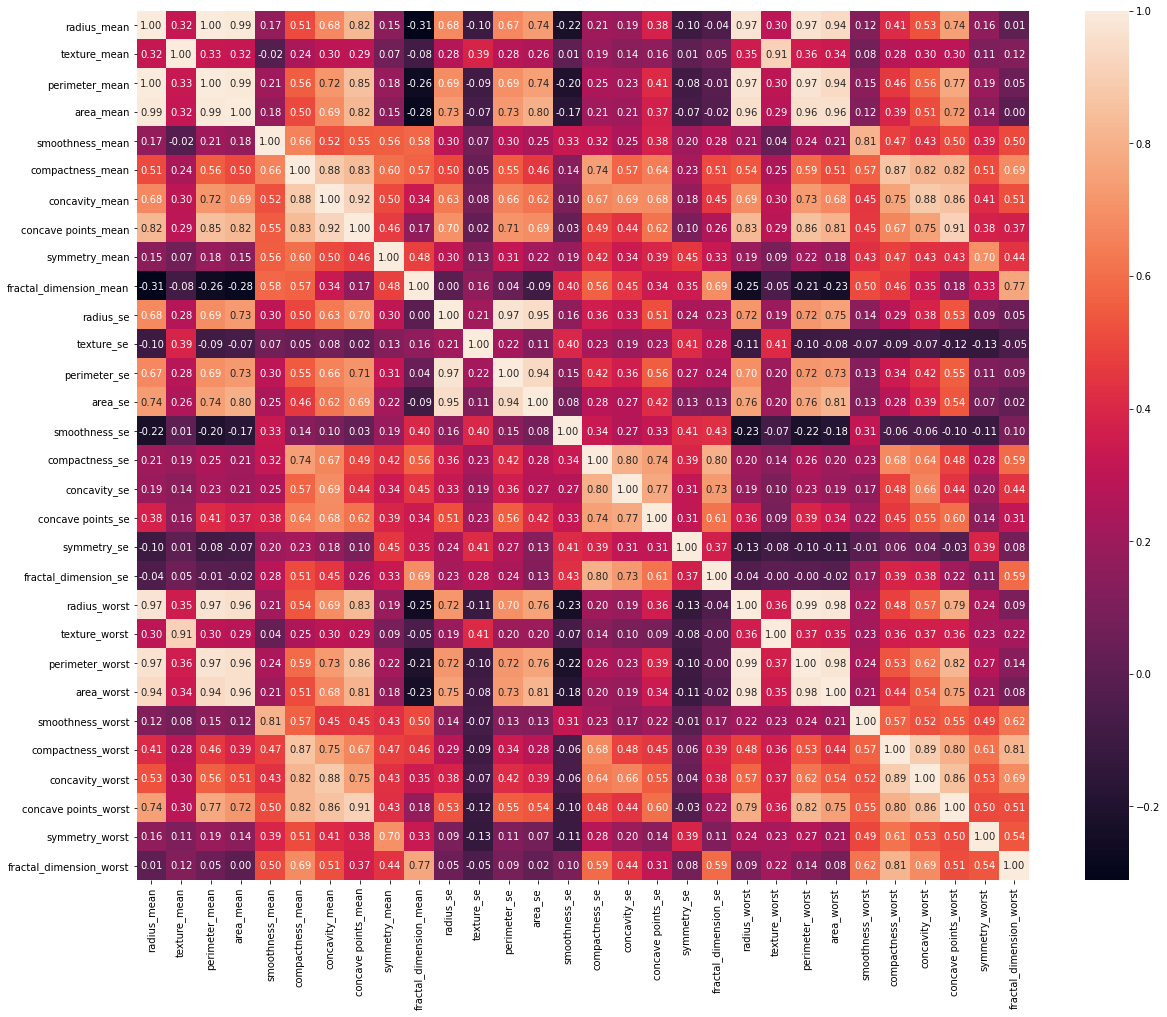

In [19]:
# correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(person_corr, annot=True, fmt='.2f')
plt.show()

In [20]:
type(person_related.index.to_series())

pandas.core.series.Series

<Figure size 1440x1440 with 0 Axes>

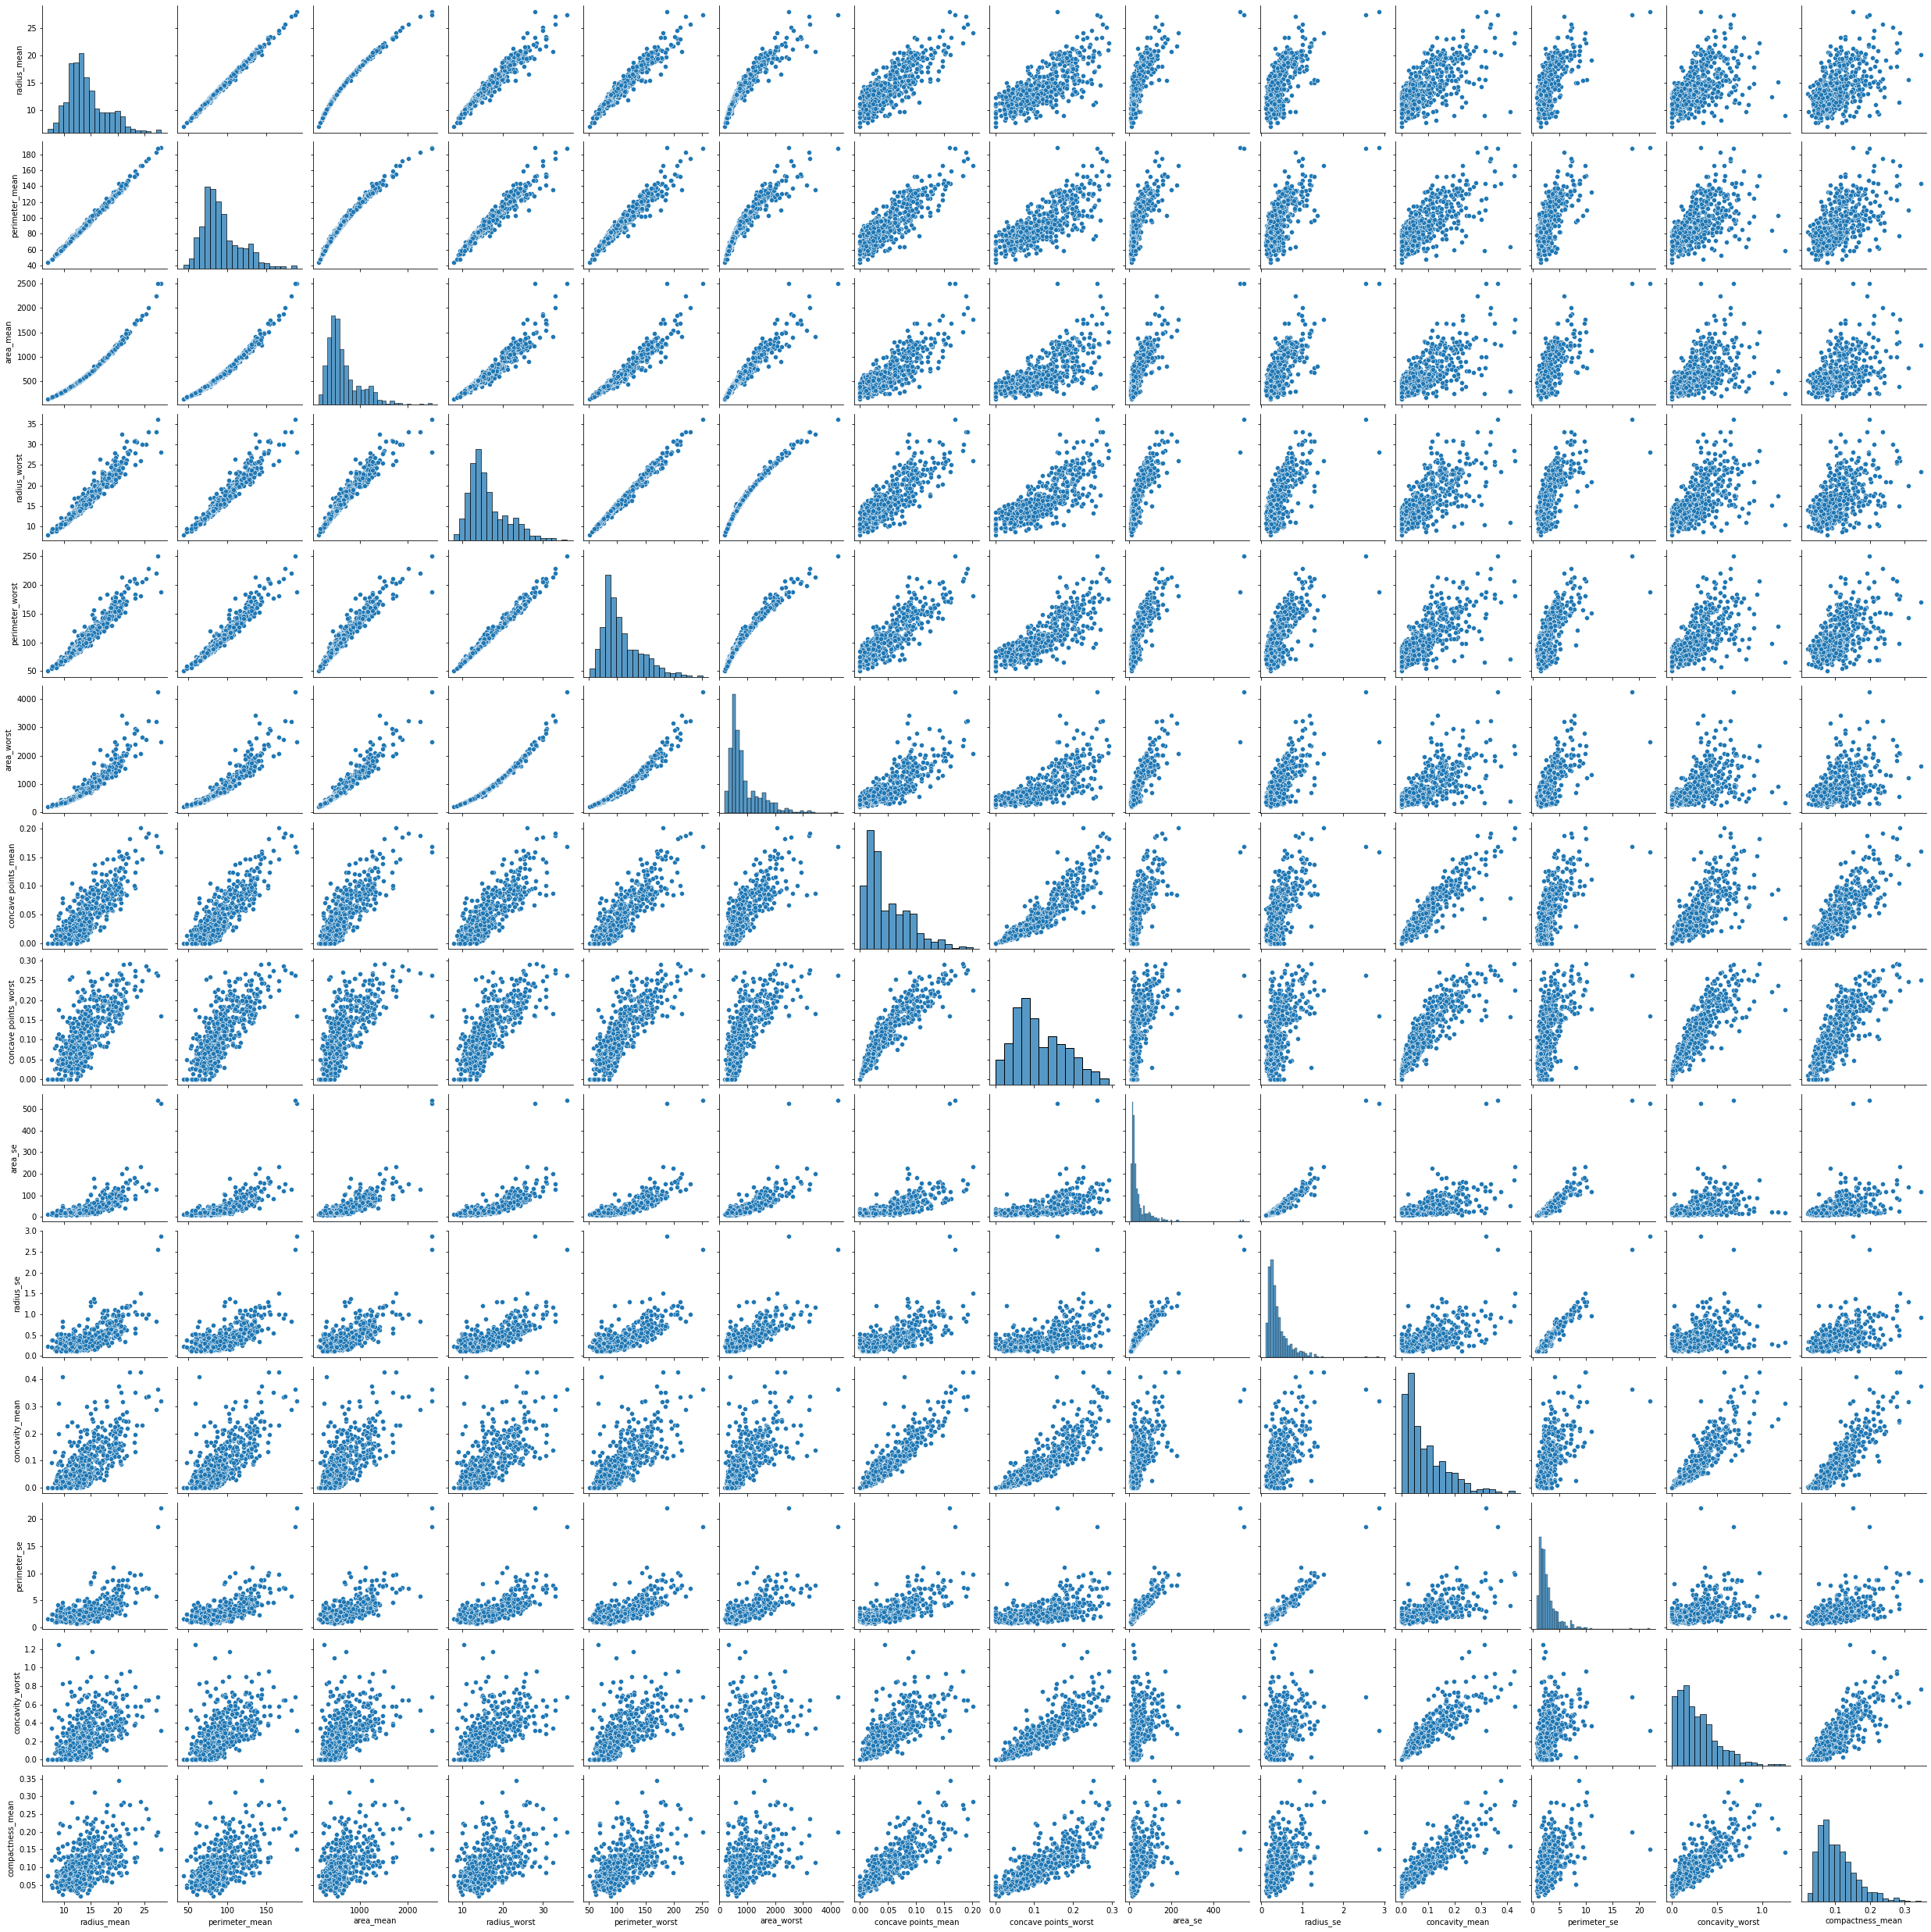

In [21]:
# pairplot
plt.figure(figsize=(20, 20))
sns.pairplot(dataset.loc[:, person_related.index.to_list()])
plt.show()

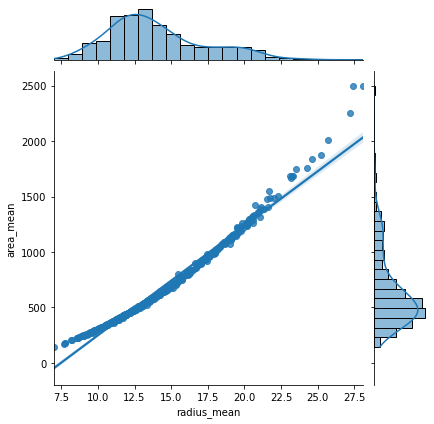

In [22]:
# joint plot example
# radius_mean vs area_mean
sns.jointplot(x='radius_mean',y='area_mean', data=dataset, kind='reg')
plt.show()

In [23]:
# distribution plot
# data distribution overview
dataset.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

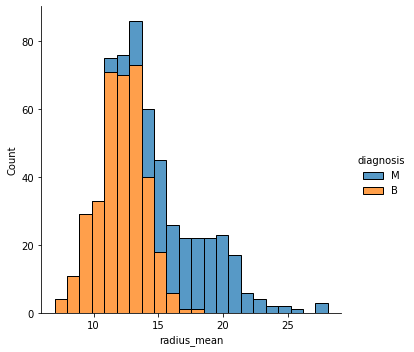

In [24]:
# distribution plot
sns.displot(dataset, x='radius_mean', hue='diagnosis', multiple="stack")

### Feature Engineering

In [25]:
dataset.shape

(569, 31)

### Data Modeling

In [26]:
from sklearn.model_selection import train_test_split


X = dataset.drop(columns=['diagnosis'])
Y = dataset.diagnosis.copy()

# train test spliting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2022)

In [27]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


#### XGBoost

In [28]:
from xgboost import XGBClassifier

In [29]:
Y_train.value_counts()

B    254
M    144
Name: diagnosis, dtype: int64

In [30]:
# The use of label encoder in XGBClassifier is deprecated and will be removed in a future release
# To fix this, encode the labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
Y_train = Y_train.transform(lambda x: 0 if x == 'B' else 1)
Y_test = Y_test.transform(lambda x: 0 if x == 'B' else 1)
print(Y_train.value_counts())
print(Y_test.value_counts())

0    254
1    144
Name: diagnosis, dtype: int64
0    103
1     68
Name: diagnosis, dtype: int64


In [31]:
xgb = XGBClassifier(random_state=2022, eval_metric='logloss', use_label_encoder=False)
xgb.fit(X_train, Y_train)
y_predicted = xgb.predict(X_test)

### Evaluate Result

##### Accuracy

In [32]:
# training accuracy
print('Training accuracy:', xgb.score(X_train, Y_train))
# Testing accuracy
from sklearn.metrics import accuracy_score
print('Testing accuracy:',accuracy_score(Y_test, y_predicted))

Training accuracy: 1.0
Testing accuracy: 0.9473684210526315


##### Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

[Text(0.5, 1.0, 'Confusion Matrix: { 0: "Bengin", 1: "Malignant"}')]

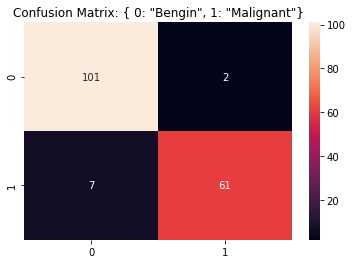

In [34]:
# confusion matrix
cm = confusion_matrix(Y_test, y_predicted)
sns.heatmap(cm, annot=True, fmt="d").set(title='Confusion Matrix: { 0: "Bengin", 1: "Malignant"}')

##### Precision, Recal and F1 score

In [35]:
from sklearn.metrics import classification_report

In [36]:
# precision, recall, and f1-score
print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.97      0.90      0.93        68

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



##### ROC curve and AUC

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
# calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(Y_test, y_predicted)

In [39]:
# calculate auc
auc_value = auc(fpr, tpr)
print(auc_value)

0.9388206739006282


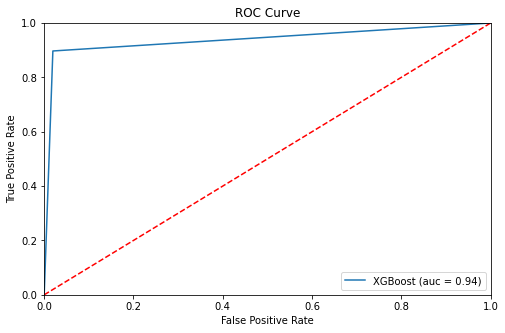

In [40]:
# ROC curve
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f'XGBoost (auc = {auc_value:0.2f})')
# y = x
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

##### xgboost plot tree

In [41]:
from xgboost import plot_tree

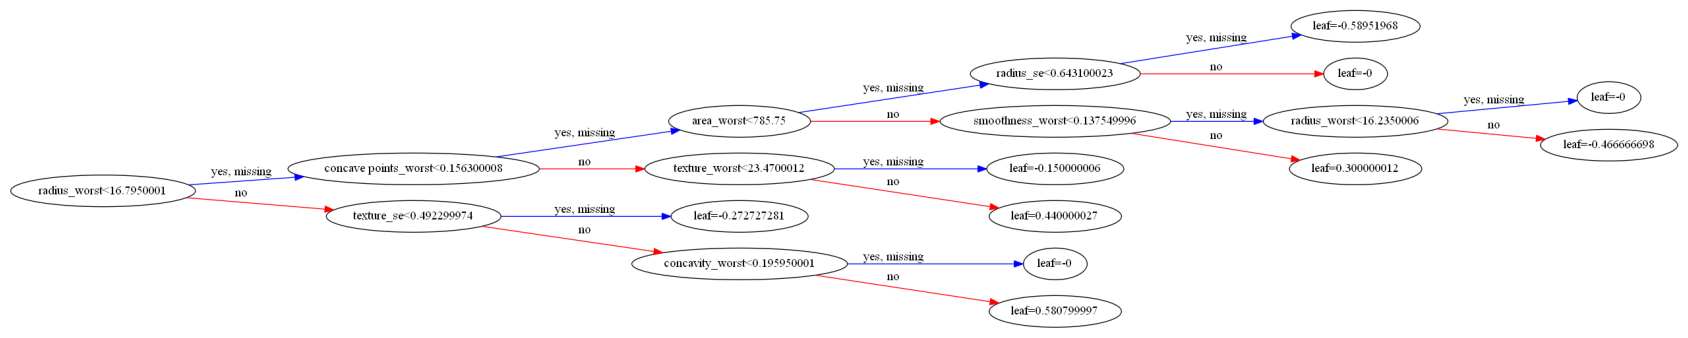

In [46]:
fig, ax = plt.subplots(figsize=(30, 20))
plot_tree(xgb, num_trees=0, rankdir='LR', ax=ax)
plt.savefig('xgboost_plot-tree.png')

##### Feature Importances

In [58]:
feature_importances = pd.Series(xgb.feature_importances_, index=X_test.columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances

radius_worst               0.330723
perimeter_worst            0.328490
concave points_worst       0.064914
texture_se                 0.038047
area_mean                  0.031883
smoothness_worst           0.028238
texture_worst              0.019453
area_worst                 0.018040
perimeter_se               0.015838
concavity_worst            0.015536
radius_mean                0.014954
area_se                    0.013853
texture_mean               0.013822
radius_se                  0.011579
smoothness_se              0.008280
concave points_mean        0.007059
concavity_mean             0.006962
fractal_dimension_worst    0.004789
compactness_se             0.004475
compactness_mean           0.004372
symmetry_worst             0.004321
symmetry_mean              0.004283
symmetry_se                0.003631
smoothness_mean            0.003144
fractal_dimension_se       0.001632
concavity_se               0.001027
concave points_se          0.000656
fractal_dimension_mean     0

In [62]:
feature_importances.iloc[:10]

radius_worst            0.330723
perimeter_worst         0.328490
concave points_worst    0.064914
texture_se              0.038047
area_mean               0.031883
smoothness_worst        0.028238
texture_worst           0.019453
area_worst              0.018040
perimeter_se            0.015838
concavity_worst         0.015536
dtype: float32

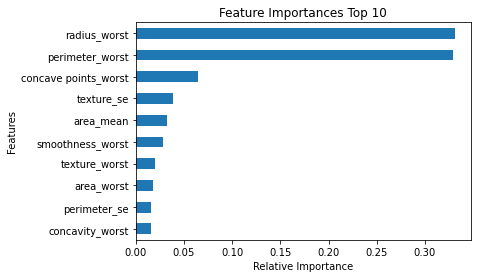

In [65]:
# reverse order to adapt to horizontal bar 
feature_importances.iloc[:10].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances Top 10')
plt.show()